# Retraining Classifier
In the previous examples, the classifier was only trained in the first generation, and a artificial decision function is used. Here, one example is given with a true decision function retrained in every time step.

In [3]:
import sys
import numpy as np
sys.path.append("../")

from fairensics.methods import AccurateDisparateImpact, DisparateMistreatment

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

from long_term_fairness.ltf_plot import LongTermFairnessPlot
from long_term_fairness.ltf_data.individual_data_generator import DataGenerator as IndDataGen
from long_term_fairness.ltf_aif.longterm_aif import AifLongTermMetric, AifLongTermPrediction

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# The helper class is necessary to use sklearn with the ltf framework.
class CLF:
    def __init__(self, clf=LogisticRegression()):
        self.c = clf
    def predict(self, X, X_s):
        return self.c.predict(X)
    def fit(self, X, X_s, y):
        self.c.fit(X, y)   

## 1. Unconstrained Example
Again, first the unconstrained example with logistic regression is run. But this time, the logistic regression is retrained after every iteration.

In [6]:
# Data generator
generator = IndDataGen(mean_pos=[0, 1],
                       mean_neg=[8, 9],
                       num_positive_label=50,
                       num_negative_label=50,
                       discrimination_factor=.9)

In [7]:
# Metric with default parameters.
metric = AifLongTermMetric()

In [12]:
# Unconstrained clf.
clf = CLF(LinearSVC())

In [9]:
# The ltf plot, with updated clf after each iteration.
l = LongTermFairnessPlot(generator, clf, metric.metric, x_lim=[-3, 12], y_lim=[-1, 13], update_clf=True)

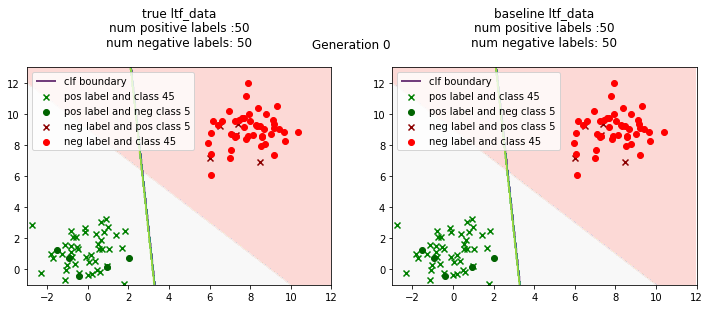

In [10]:
# Init data and plot first iteration.
l.init_data()
l.plot_generation()

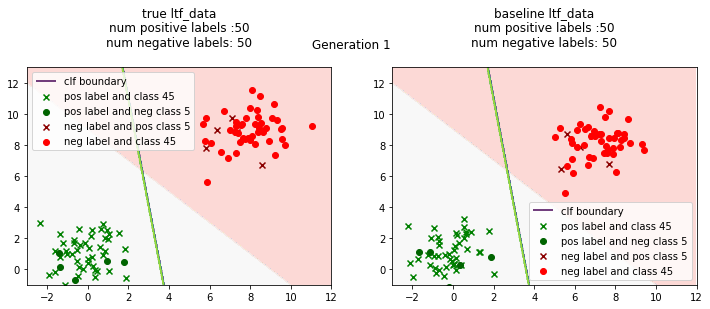

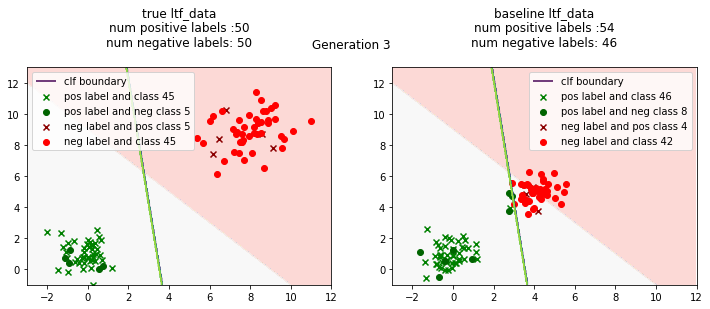

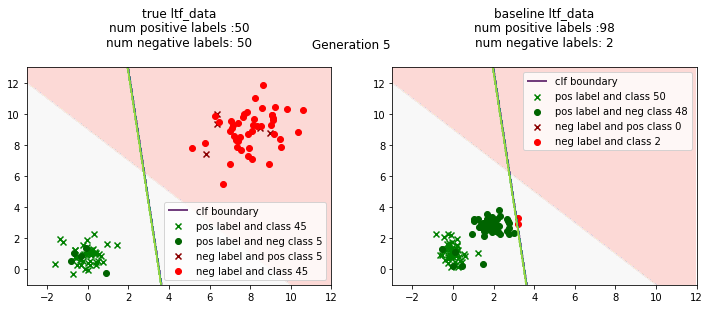

In [11]:
# Run six iterations.
for i in range(6):
    l.run_generation()
    l.run_baseline_generation()
    if i % 2 == 0:
        l.plot_generation()

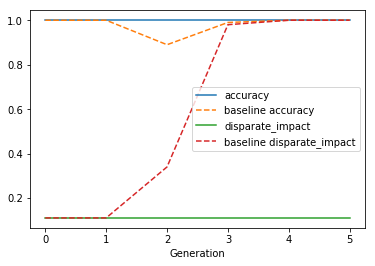

In [10]:
l.plot_ltf(metric._metrics)

From above plot it is visible, that accuracy and disparate impact are constant over time in the true case, while disparate impact improves in the baseline case. 

## 2. Constrained Example 
The constrained classifier learns another decision boundary and has to except errors to satisfy fairness. This example is done using an artificial rule.

In [11]:
generator = IndDataGen(mean_pos=[0, 1],
                       mean_neg=[15, 16],
                       cov_neg= [[6, 0],[0, 7]], 
                       num_positive_label=50,
                       num_negative_label=50,
                       discrimination_factor=.9,
                       local_variance=[[0.001, 0], [0, 0.001]])

clf = AifLongTermPrediction(PrejudiceRemover())

l = LongTermFairnessPlot(generator, clf, metric.metric, x_lim=[-3, 20], y_lim=[-1, 20], update_clf=True)

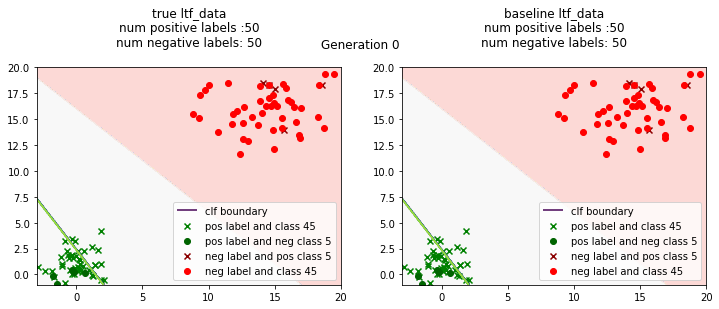

In [12]:
l.init_data()
l.plot_generation()

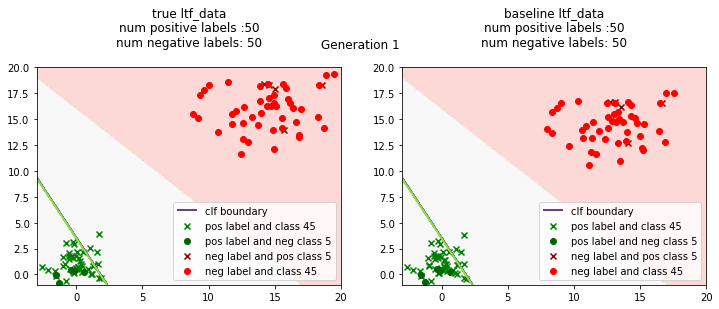

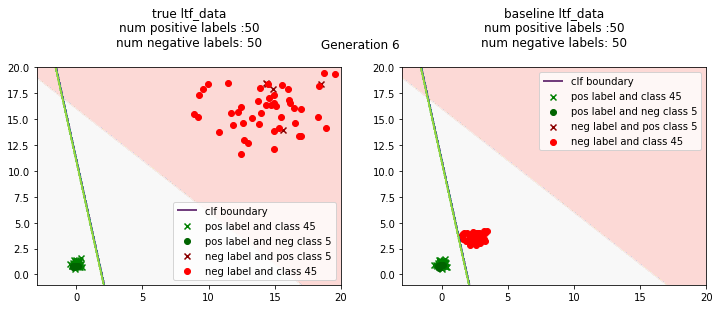

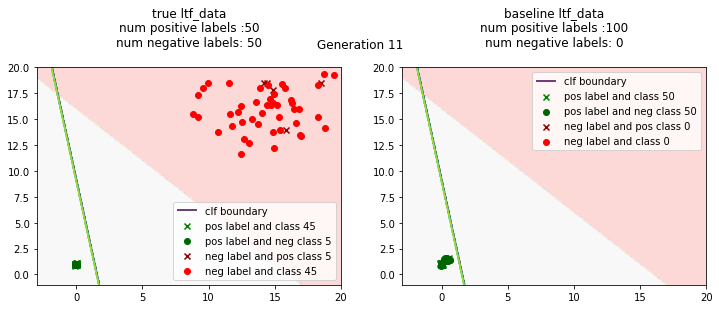

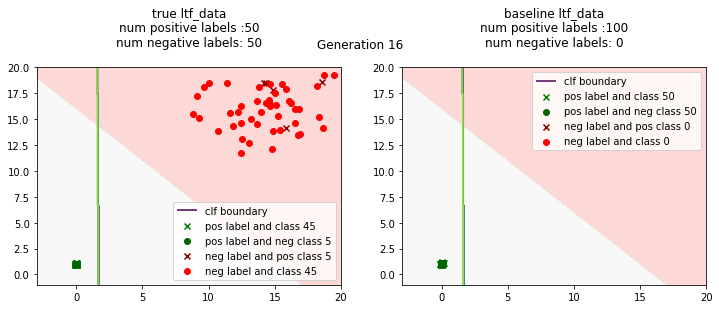

In [13]:
for i in range(20):
    l.run_generation()
    l.run_baseline_generation()
    if i % 5 == 0:
        l.plot_generation()

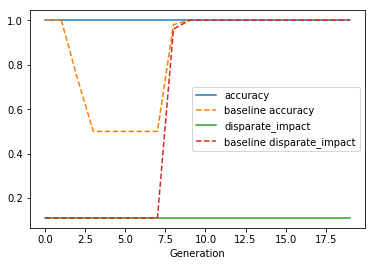

In [14]:
l.plot_ltf(metric._metrics)

In [ ]:
l.plot_generation()

In the lower variance example, individuals do not cross the decision boundary and are therefore never move towards the positive center.